<a href="https://colab.research.google.com/github/SuganthiEvangeline/Fundamental/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving classData.csv to classData.csv


In [ ]:
import io
data = io.BytesIO(uploaded['classData.csv'])

In [ ]:
 df = pd.read_csv('/content/classData.csv')
 df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [ ]:
df['Fault_Type'] = df['G'].astype('str') + df['C'].astype('str') + df['B'].astype('str') + df['A'].astype('str')
df.head().style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [ ]:
df['Fault_Type'][df['Fault_Type'] == '0000' ] = 'NO Fault'
df['Fault_Type'][df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df['Fault_Type'][df['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
df['Fault_Type'][df['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

In [ ]:
df.sample(10).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
7855,0,0,0,0,-66.611884,39.446572,24.296396,0.085038,-0.548711,0.463674,NO Fault
1142,1,0,1,1,-631.358701,406.685283,11.348124,-0.126656,0.257281,-0.130625,Line A Line B to Ground Fault
7184,0,0,0,0,38.753340,-28.312171,-13.501183,0.481429,0.075248,-0.556678,NO Fault
4936,1,1,1,1,476.111911,-882.905752,406.791581,-0.021046,-0.021291,0.042337,Line A Line B Line C to Ground Fault
3428,0,1,1,1,337.195673,-886.518901,551.480777,-0.026855,-0.014713,0.041568,Line A Line B Line C
5247,1,1,1,1,-651.385870,-191.514404,842.898011,-0.039865,0.032420,0.007445,Line A Line B Line C to Ground Fault
7624,0,0,0,0,55.252713,-6.793986,-51.392044,0.181614,0.418331,-0.599944,NO Fault
3183,0,1,1,0,17.148161,-767.751862,752.962671,-0.232077,-0.003048,0.235124,Line B to Line C Fault
6383,0,0,0,0,37.426676,-26.037203,-14.694346,0.485838,0.067285,-0.553123,NO Fault
3431,0,1,1,1,375.200867,-890.840471,517.796530,-0.024985,-0.016630,0.041615,Line A Line B Line C


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Fault_Type'] = encoder.fit_transform(df['Fault_Type'])
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


In [ ]:
X = df.drop(['Fault_Type'],axis=1)
y = df['Fault_Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


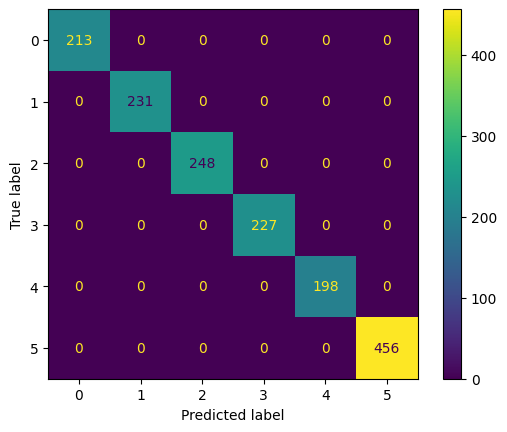

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)
cm = confusion_matrix(y_test, decision.predict(X_test))
decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision.classes_)
# Plot the confusion matrix
disp.plot()
plt.show()

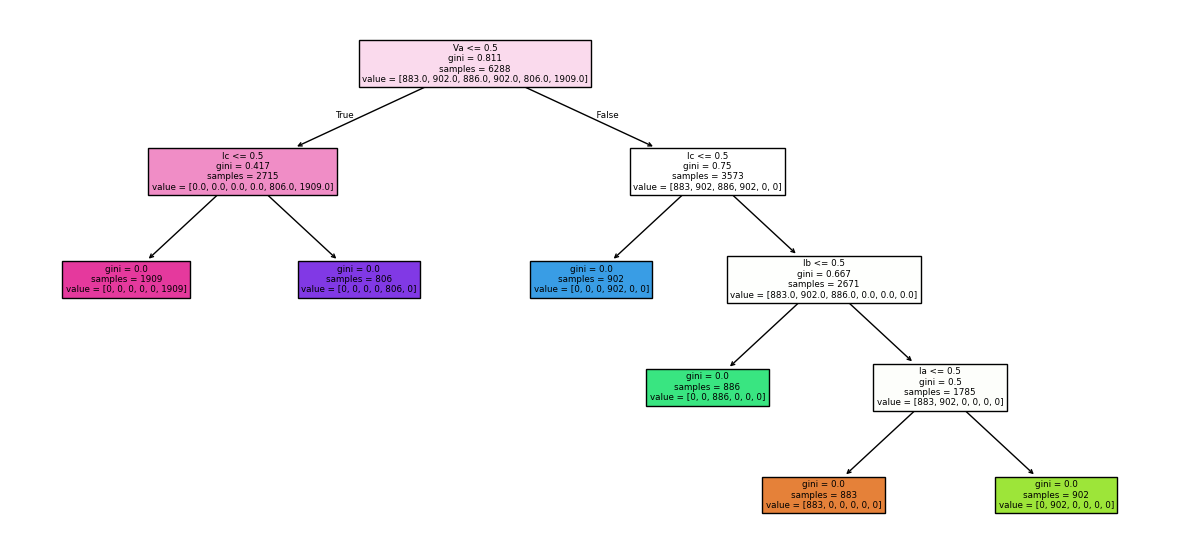

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(decision,filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()

In [ ]:
from sklearn import tree
def tree_plot(model_name):
    plt.figure(figsize=(20,20))
    features = df.columns
    classes = ['NO Fault','Line A to Ground Fault','Line B to Line C Fault','Line A Line B to Ground Fault','Line A Line B Line C','Line A Line B Line C to Ground Fault']
    tree.plot_tree(model_name,feature_names=features,class_names=classes,filled=True)
    plt.show()

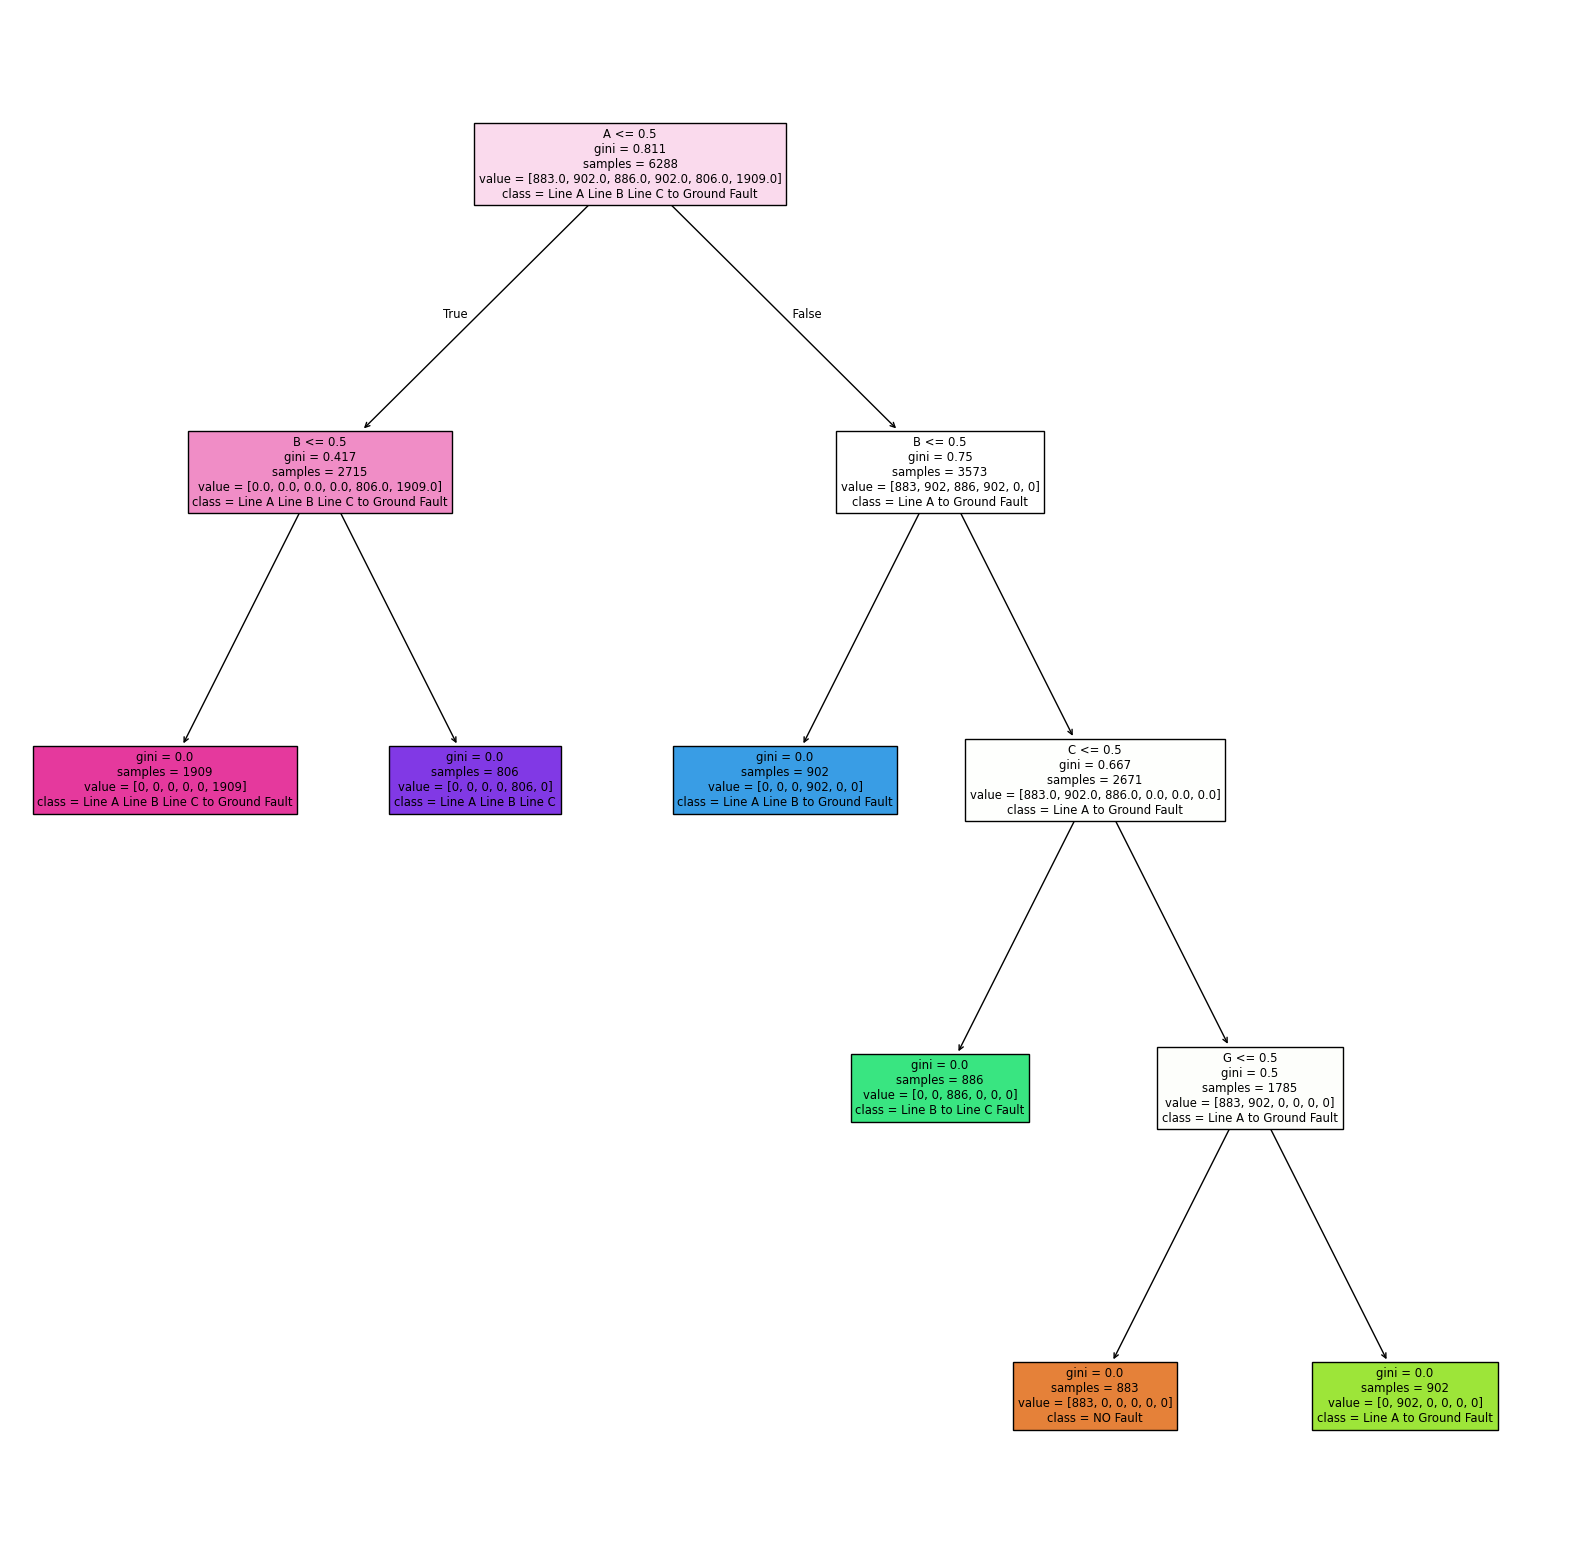

In [ ]:
tree_plot(decision)

In [ ]:
prediction2 = decision.predict(X_test)
print(prediction2)

[1 0 0 ... 0 0 5]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction2})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
7063,5,5
4417,1,1
2945,4,4
2560,4,4
2699,4,4
